# Import Lib

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

# Function Webcam Capturing

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)
  img = cv2.resize(img, (640,480), interpolation = cv2.INTER_AREA)
  img.shape

  return img

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename, img

# Function Stream Image from Webcam

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# Test Capture

<IPython.core.display.Javascript object>

Saved to 0/0.jpg


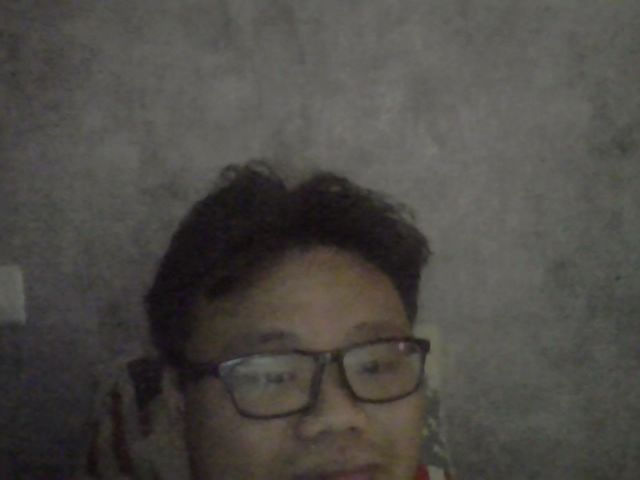

<IPython.core.display.Javascript object>

Saved to 0/1.jpg


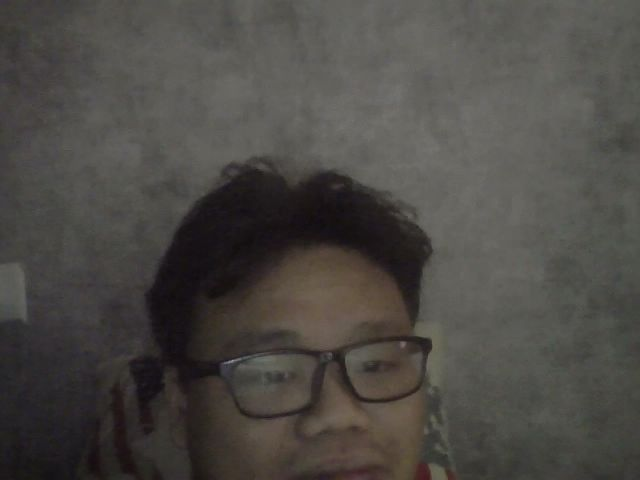

<IPython.core.display.Javascript object>

Saved to 0/2.jpg


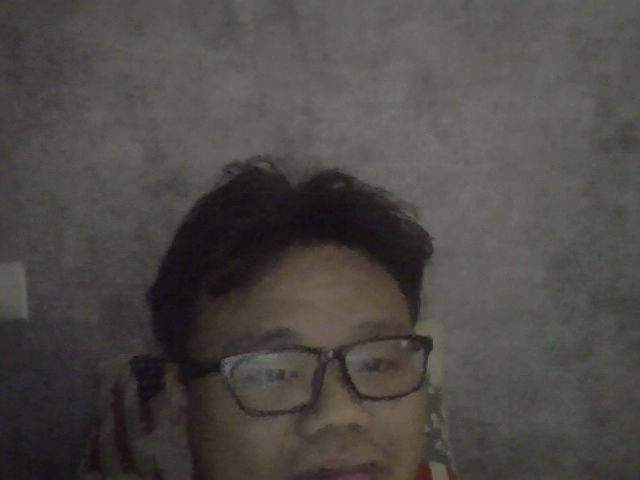

<IPython.core.display.Javascript object>

Saved to 0/3.jpg


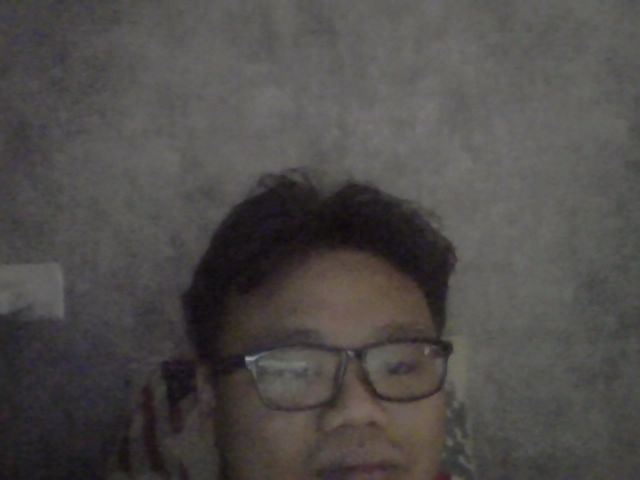

<IPython.core.display.Javascript object>

Saved to 0/4.jpg


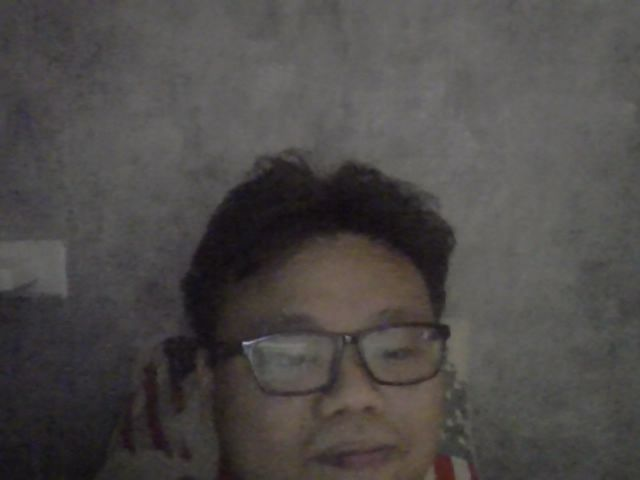

<IPython.core.display.Javascript object>

Saved to 0/5.jpg


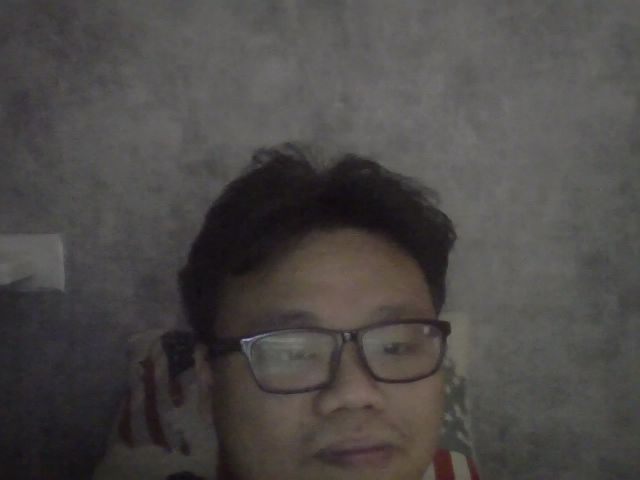

<IPython.core.display.Javascript object>

Saved to 0/6.jpg


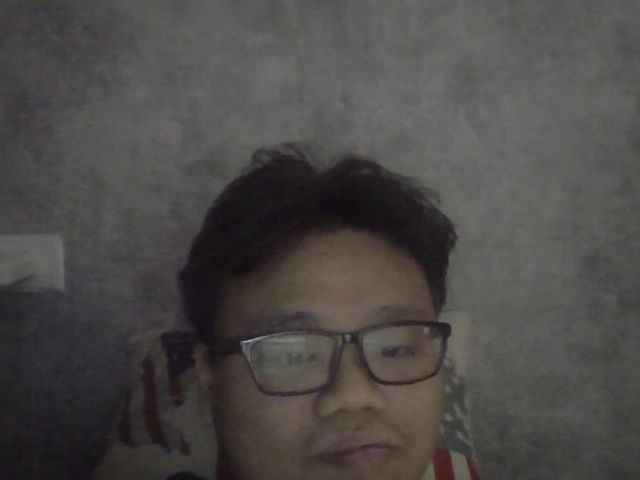

<IPython.core.display.Javascript object>

Saved to 0/7.jpg


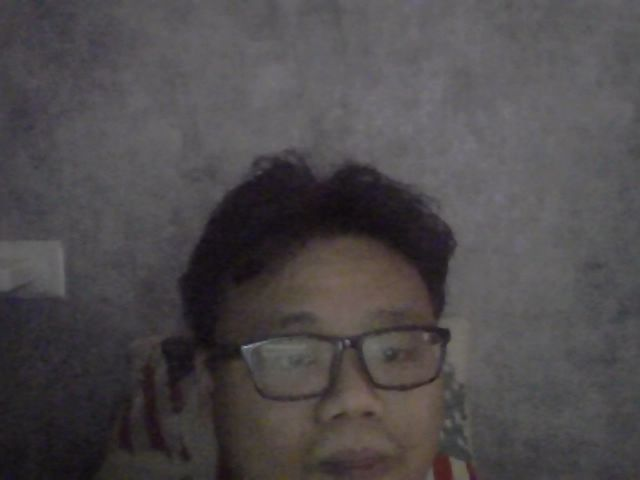

<IPython.core.display.Javascript object>

Saved to 0/8.jpg


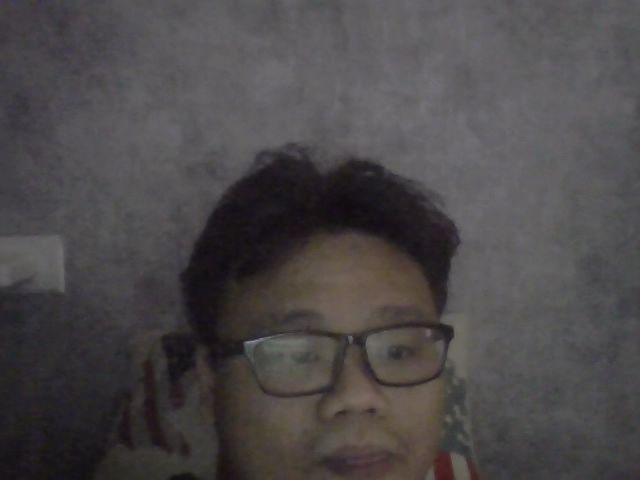

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
import time
for i in range(100):
  try:
    filename, img = take_photo('0/'+str(i)+'.jpg')
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
    time.sleep(0.2)

  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [ ]:
# Đường dẫn tới file mô hình đã huấn luyện
model_path = '/content/drive/MyDrive/model.h5'

# Import the necessary function
from tensorflow.keras.models import load_model

# Tải mô hình
model = load_model(model_path)

# Các nhãn của lớp (tên động vật)
class_labels = ['cavallo','elefante', 'gatto', 'pecora', 'farfalla', 'scoiattolo',
                'mucca', 'gallina', 'ragno', 'cane']

# Kích thước ảnh đầu vào cho mô hình
input_shape = (224, 224)

In [ ]:
# Khởi động luồng video từ webcam
video_stream()

# Label ban đầu cho video
label_html = 'Capturing...'

while True:
    js_reply = eval_js('stream_frame("{}", "{}")'.format(label_html, ''))

    # Chuyển đổi dữ liệu ảnh từ JavaScript sang OpenCV
    frame = js_to_image(js_reply['img'])

    # Resize ảnh về kích thước đầu vào của mô hình
    img = cv2.resize(frame, input_shape)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán
    pred = model.predict(img)
    pred_label = class_labels[np.argmax(pred)]

    # Cập nhật nhãn cho video
    label_html = 'Predicted: {}'.format(pred_label)


<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 506ms/step


KeyboardInterrupt: 